# Tarea 1

Hecha por: *Tu nombre*

# Problema 5: Raíces

## 1 Evaluando nuestros métodos
Determina las raíces de las siguientes funciones con todos los métodos que conocemos. Para cada caso, explica cual es el mejor método y cuál es el peor.  Explica como es el error numérico. Gráfica las funciones para que determines el intervalo a evaluar.

i) Encuentra las dos raíces de $2x^2+5x-3=0$

ii) $f(x)=\cos(x)+(1+x^2)^{-1}$

iii) $f(x)=(x-2)^{2}-\ln(x)$

iv) $ f(x)=x^3-3x+2$ (Raíz doble)

v) $x^{1/3}$

vi) $x^2-14x-50$

vii) $x-\cos x=0$ en $(0,\frac{\pi}{2})$

viii) $f(x)=\cos x -x^3$ con una valor inicial de $x_0=0.5$

ix) $\tan(\pi x)-6=0$ en $(0,1)$

x)
$$
f(x)=\frac{1}{(x-0.3)^2+0.01}-\frac{1}{(x-0.8)^2+0.04}
$$

xi)
$$
f(x)=x^4-6.4x^3+6.45x^2+20.538x-31.752
$$






# **i) $2x^2+5x-3=0$**

In [4]:
from sympy import * 
from numpy import *
from math import *
import numpy as np 
import math as mt 
import matplotlib.pyplot as plt

In [5]:
#Vamos a encontrar las dos raices usando sympy 
x = symbols('x')
solve(2*x**2 + 5*x - 3, x)

[-3, 1/2]

(-10.0, 10.0)

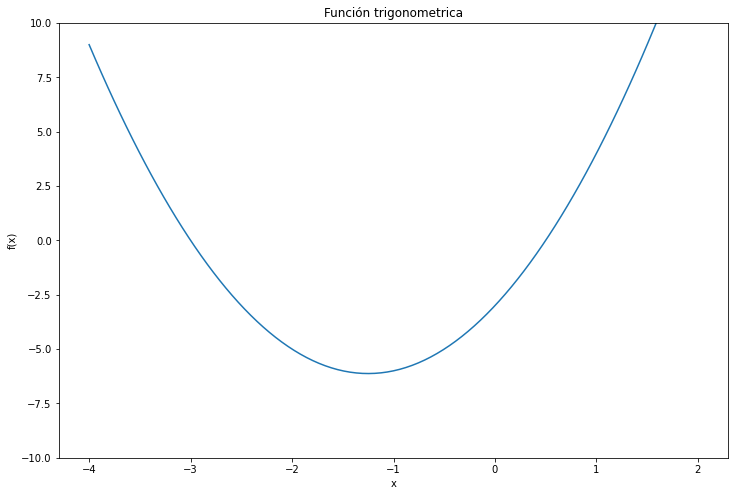

In [6]:
#Vamos a graficar la función para encontrar los intervalos
x2 = np.linspace(-4,2,99)
def fun(x): 
  res = 2*x**2 + 5*x - 3
  return res 

y2 = np.linspace(-8,10,99)
for i in range(0,99):
    y2[i]=fun(x2[i])

fig = plt.figure(figsize=(12,8))
plt.plot(x2, y2)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Función trigonometrica')
plt.ylim(-10,10)

**Búsqueda incremental "Incremental search"**

In [7]:
def incremental(f,a,b,dx):
    x0=a;f0=f(x0)
    x1=x0+dx;f1=f(x1)
    contador=0.0
    while f0*f1>0.0:
        if x1>=b: return ('nada') #salgo del bucle infinito
        x0=x1;f0=f1
        x1=x0+dx;f1=f(x1)
        contador=contador+1
    return [x1,contador]

def f(x):
    return 2*x**2+5*x-3
print(incremental(f,0,0.8,1e-4))
print(incremental(f,-3.5,-2.5,1e-4))

[0.5000999999999612, 5000.0]
[-2.999999999998945, 4999.0]


Se observa que para encontrar una de las raíces repitió el proceso 5000 veces y para la otra lo repitió 4999 veces. 

**Método de Bisección**

In [8]:
def biseccion(f,a,b,epsilon=1e-6):
    contador=0
    dx=abs(b-a)
        #return 'Da un intervalo correcto'
    while dx>epsilon:
        x=(a+b)/2.0
        if (f(a)*f(x))<0:
          b=x #izquierda
        elif (f(x)*f(b))<0:
        #else:
            a=x #derecho
        else:
            dx=epsilon/2
            print('El intervalo no tiene raíz')
        dx=abs(b-a) #renombrar intervalo
        contador=contador+1
    return [x, contador]

print(biseccion(f,-0.5,0.8,1e-4))
print(biseccion(f,-4,-1,1e-4))

[0.4999938964843751, 14]
[-2.999969482421875, 15]


In [9]:
def bis_method(f, a, b, N):
    if f(a)*f(b) >= 0:
        print('El metodo de biseccion fallo')
        return None
    a_n = a
    b_n = b
    for n in range(1, N+1):
        m_n = (a_n + b_n)/2
        f_m_n = f(m_n)
        if f(a_n)*f_m_n < 0:
            a_n = a_n
            b_n = m_n
        elif f(b_n)*f_m_n < 0:
            a_n = m_n
            b_n = b_n
        elif f_m_n == 0:
            print('Solucion exacta encontrada')
            return m_n
        else:
            print('El método de biseccion fallo')
            return None
    return (a_n + b_n) / 2

p = lambda x: 2*x**2+5*x-3
approx = bis_method(p,0,0.8,25)
approx1 = bis_method(p,-3.5,-2.5,25)
print(approx)
print(approx1)

Solucion exacta encontrada
Solucion exacta encontrada
0.5
-3.0


**Método de Newton-Raphson**

In [10]:
def newton(f,df,x,epsilon=1e-6):
    dx=2*epsilon
    contador = 0
    while dx> epsilon and contador<1000:
        x1=x-f(x)/df(x)
        dx=abs(x-x1)
        x=x1
        contador=contador+1
    return [contador,x,dx]

f=lambda x: 2*x**2+5*x-3
df=lambda x: 4*x+5

print(newton(f,df,1,1e-7))
print(newton(f,df,-4,1e-7))

[5, 0.5, 1.2434497875801753e-14]
[5, -3.0, 1.237849822643966e-10]


**Método del Secante**

In [11]:
from sympy.assumptions.refine import refine_atan2
def sec_method(f, a, b, N):
    if f(a)*f(b) >= 0:
        print("El metodo de la secante fallo")
        return None
    a_n = a
    b_n = b
    for n in range(1, N+1):
        m_n = a_n - f(a_n) * (b_n - a_n) / (f(b_n) - f(a_n))
        f_m_n = f(m_n)
        if f(a_n)*f_m_n < 0:
            a_n = a_n
            b_n = m_n
        elif f(b_n)*f_m_n < 0:
            a_n = m_n
            b_n = b_n
        elif f_m_n == 0:
            print('Solucion exacta encontrada')
            return m_n
        else:
            print('El método de la secante fallo')
            return None
    return a_n - f(a_n) * (b_n - a_n)/(f(b_n) - f(a_n))

R1 = sec_method(p,0,0.8,20)
R2 = sec_method(p,-3.5,-2.5,20)
print(R1)
print(R2)

Solucion exacta encontrada
Solucion exacta encontrada
0.5
-3.0


**Método del Ridders**

In [24]:
from math import *
def ridders(f,x1,x2,tol=1e-9):
    n=0
    f1=f(x1)
    if f1==0: return x1
    f2=f(x2)
    if f2==0: return x2
   # if f1*f2>0.0: return np.nan #intervalos correctos
    while abs(x1-x2)> tol:
        x3=0.5*(x1+x2);f3=f(x3)
        raiz=sqrt(f3**2.-f1*f2)
        if raiz==0:return None
        fraccion=(x3-x1)*f3/raiz
        if (f1-f2)<0.0: fraccion=-fraccion #creciente
        x4=x3+fraccion; f4=f(x4)
        if (f3*f4)>0.0: #decreciente
            if f1*f4>0.0:x1=x3;f1=f3
            else: x2=x3;f2=f3
        else:             
            x1=x3;x2=x4;f1=f3;f2=f4
        n+=1
    return x4,n

f=lambda x:2*x**2+5*x-3
print(ridders(f,0.,0.8,0.0000002))
print(ridders(f,-3.5,-2.5,0.0000002)) 

# Aquí todo bien

(0.5, 20)
(-3.0, 1)


# **ii) $f(x)=cos(x)+(1+x^2)^{-1}$**

In [ ]:
#Vamos a resolver la ecuación usando numpy


# **iii) $g(x)=(x-2)^2-ln(x)$**

# **iv) $h(x)=x^3-3x+2$**

In [13]:
#Vamos a resolver la ecuación usando numpy
x = symbols('x')
solve(x**3 - 3*x + 2, x)

[-2, 1]

(-10.0, 10.0)

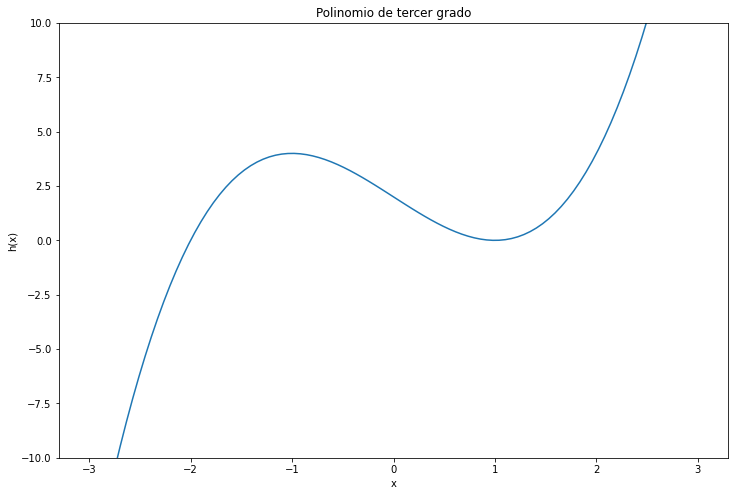

In [14]:
#Vamos a graficar la función para encontrar los intervalos
x2 = np.linspace(-3,3,99)
def h(x): 
  res = x**3 - 3*x + 2
  return res 

y2 = np.linspace(-5,10,99)
for i in range(0,99):
    y2[i]=h(x2[i])

fig = plt.figure(figsize=(12,8))
plt.plot(x2, y2)
plt.xlabel('x')
plt.ylabel('h(x)')
plt.title('Polinomio de tercer grado')
plt.ylim(-10,10)

**Búsqueda incremental "Incremental search"**

In [15]:
print(incremental(h,-3,-1,1e-4))
print(incremental(h,0,2,1e-4))

[-1.99999999999789, 9999.0]
[0.9999999999999062, 9999.0]


**Método de Bisección**

In [16]:
h1 = bis_method(h,-3,-1,25)
h2 = bis_method(h,0.8,1.5,25)
print(h1)
print(h2)

Solucion exacta encontrada
El metodo de biseccion fallo
-2.0
None


**Método de Newton-Raphson**

In [17]:
h=lambda x: x**3 - 3*x + 2
dh=lambda x: 3*x**2 - 3

print(newton(h,dh,-2,1e-4))
print(newton(h,dh,1.4,1e-4))

[1, -2.0, 0.0]
[13, 1.000055088514252, 5.508649118546316e-05]


**Método del Secante**

In [39]:
h_1 = sec_method(h,-2.5,-1,20)
h_2 = sec_method(h,0.5,2,20)
print(h_1)
print(h_2)

El metodo de la secante fallo
-1.9999999999984714
None


**Método del Ridders**

In [49]:
iv = lambda x: x**3 - 3*x + 2
print(ridders(iv,-3,-1,0.000002))
print(ridders(iv,-1,1,0.0000002))

(-2.0, 1)
1


# **v) $i(x)=x^{1/3}$**

In [57]:
#Vamos a resolver la ecuación usando numpy
x = symbols('x')
solve(x**(1/3), x)

[0.0]

# **vi) $j(x)=x^2-14x-50$**

In [29]:
#Vamos a resolver la ecuación usando numpy
x = symbols('x')
solve(x**2 - 14*x - 50, x)

[7 - 3*sqrt(11), 7 + 3*sqrt(11)]

(-100.0, 1000.0)

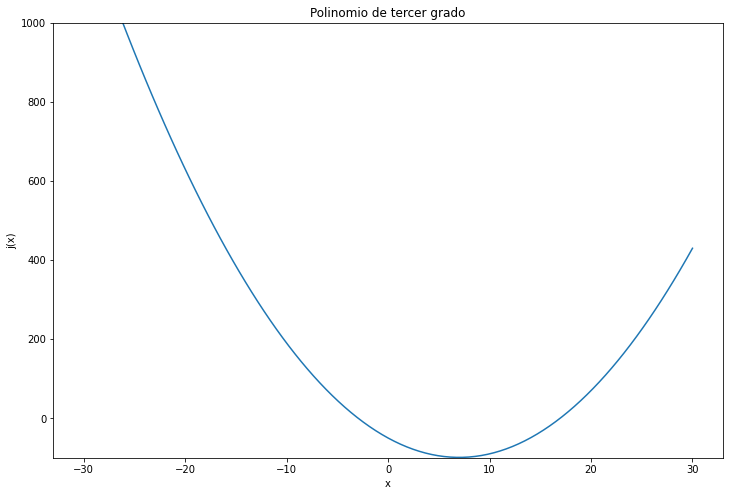

In [30]:
#Vamos a graficar la función para encontrar los intervalos
import numpy as np
x2 = np.linspace(-30,30,99)
def j(x): 
  res = x**2 - 14*x - 50
  return res 

y2 = np.linspace(-100,1000,99)
for i in range(0,99):
    y2[i]=j(x2[i])

fig = plt.figure(figsize=(12,8))
plt.plot(x2, y2)
plt.xlabel('x')
plt.ylabel('j(x)')
plt.title('Polinomio de tercer grado')
plt.ylim(-100,1000)

**Búsqueda incremental "Incremental search"**

In [31]:
print(incremental(j,-3,-1,1e-4))
print(incremental(h,14,17,1e-4))

[-2.949799999999894, 501.0]
nada


**Método de Bisección**

In [32]:
j1 = bis_method(j,-3,-1,25)
j2 = bis_method(j,15,17,25)
print(j1)
print(j2)

-2.949874371290207
16.949874371290207


**Método de Newton-Raphson**

In [33]:
j=lambda x: x**2 - 14*x - 50
dj=lambda x: 2*x - 14

print(newton(j,dj,-3,1e-4))
print(newton(j,dj,17,1e-4))

[3, -2.9498743710661994, 7.930971435143874e-10]
[3, 16.9498743710662, 7.930971435143874e-10]


**Método del Secante**

In [34]:
j_1 = sec_method(j,-3,-1,20)
j_2 = sec_method(j,14,17,20)
print(j_1)
print(j_2)

Solucion exacta encontrada
-2.9498743710662
16.9498743710662


**Método de Ridders**

In [36]:
print(ridders(j,-3,0,0.0000002))
print(ridders(j,15,17,0.0000002))

(-2.949874371066199, 24)
(16.949874371066205, 24)


# **vii) $x-cos(x)=0$ en (0,$\frac{\pi}{2})$**

In [37]:
vii = lambda x: x-mt.cos(x)
print(ridders(vii,0.6, 0.8))

(0.7390851332151606, 27)


# **viii) $k(x)=cos(x)-x^3$** con un valor inicial de $x_{0}=0.5$

In [51]:
viii = lambda x: mt.cos(x) - x**3
print(ridders(viii,0.83, 0.9))

(0.8654740331016145, 20)


# **ix) $tan(\pi x)-6=0$ en (0,1)**

In [52]:
ix = lambda x : (mt.sin(mt.pi*x)/mt.cos(mt.pi*x)) - 6
print(ridders(ix, 0.4, 0.47))

(0.44743154328874657, 26)


# **x) $k(x)=\frac{1}{(x-0.3)^2+0.01}-\frac{1}{(x-0.8)^2+0.04}$**

In [67]:
#Vamos a resolver la ecuación usando numpy
x = symbols('x')
solve(((x-0.3)**2 + 0.01)**(-1) - ((x-0.8)**2 + 0.04)**(-1), x)

[0.580000000000000]

In [53]:
x = lambda x: ((x-0.3)**2 + 0.01)**(-1) - ((x-0.8)**2 + 0.04)**(-1)
print(ridders(x, 0.5, 0.7))

(0.5800000000000001, 27)


# **xi) $l(x)=x^4-6.4x^3+6.45x^2+20.538x-31.752$**

In [59]:
#Vamos a resolver la ecuación usando numpy
x = symbols('x')
solve(x**4 - 6.4*x**3 + 6.45*x**2 + 20.538*x  - 31.752, x)

[-1.80000000000000, 2.10000000000000, 4.00000000000000]

(-50.0, 60.0)

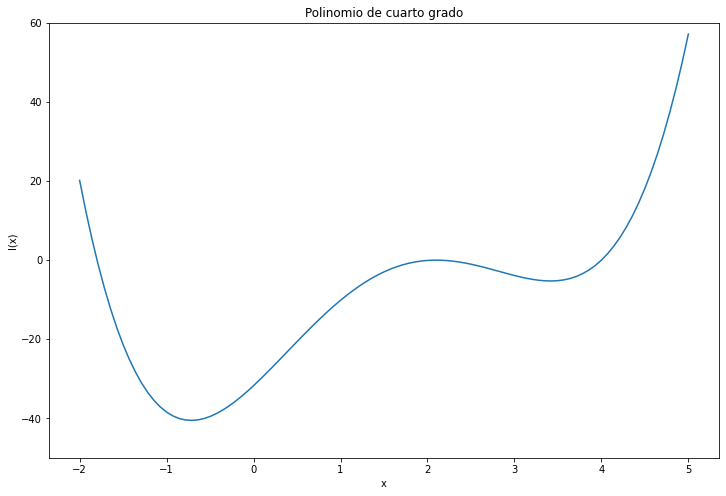

In [65]:
#Vamos a graficar la función para encontrar los intervalos
x2 = np.linspace(-2,5,99)
def l(x): 
  res = x**4 - 6.4*x**3 + 6.45*x**2 + 20.538*x - 31.752
  return res 

y2 = np.linspace(-40,10,99)
for i in range(0,99):
    y2[i]=l(x2[i])

fig = plt.figure(figsize=(12,8))
plt.plot(x2, y2)
plt.xlabel('x')
plt.ylabel('l(x)')
plt.title('Polinomio de cuarto grado')
plt.ylim(-50,60)

In [66]:
xi = lambda x:x**4 - 6.4*x**3 + 6.45*x**2 + 20.538*x - 31.752
print(ridders(xi, -1.9, -1.7))

# Aquí son tres raíces

(-1.8, 1)
